In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [27]:
low_flows = pd.read_csv('low_flow_analysis.csv')
peak_flows = pd.read_csv('peak_flow_analysis.csv')

basins = low_flows.columns[1:]
peak_years = peak_flows["water_year"].astype(int)
low_years = low_flows["climatic_year"].astype(int)

In [28]:
calpella_all_data = pd.read_csv('russian_river_data/Calpella_daily.csv')
guerneville_all_data = pd.read_csv('russian_river_data/Guerneville_daily.csv')
hopland_all_data = pd.read_csv('russian_river_data/Hopland_daily.csv')
warmsprings_all_data = pd.read_csv('russian_river_data/WarmSprings_Inflow_daily.csv')

daily = pd.read_csv('russian_river_data/daily.csv')

all_data = {'Calpella': calpella_all_data,
            'Guerneville': guerneville_all_data,
            'Hopland': hopland_all_data,
            'Warm Springs': warmsprings_all_data}

In [29]:
#Date
daily.iloc[3:,1]

#EF RUSSIAN 10 PRECIP-INC SCREENED
daily.iloc[3:,27]

3            0
4            0
5            0
6       0.0818
7            0
         ...  
5477         0
5478         0
5479         0
5480         0
5481         0
Name: 25, Length: 5479, dtype: object

Text(0.02, 0.5, 'Low Flows Extremeness')

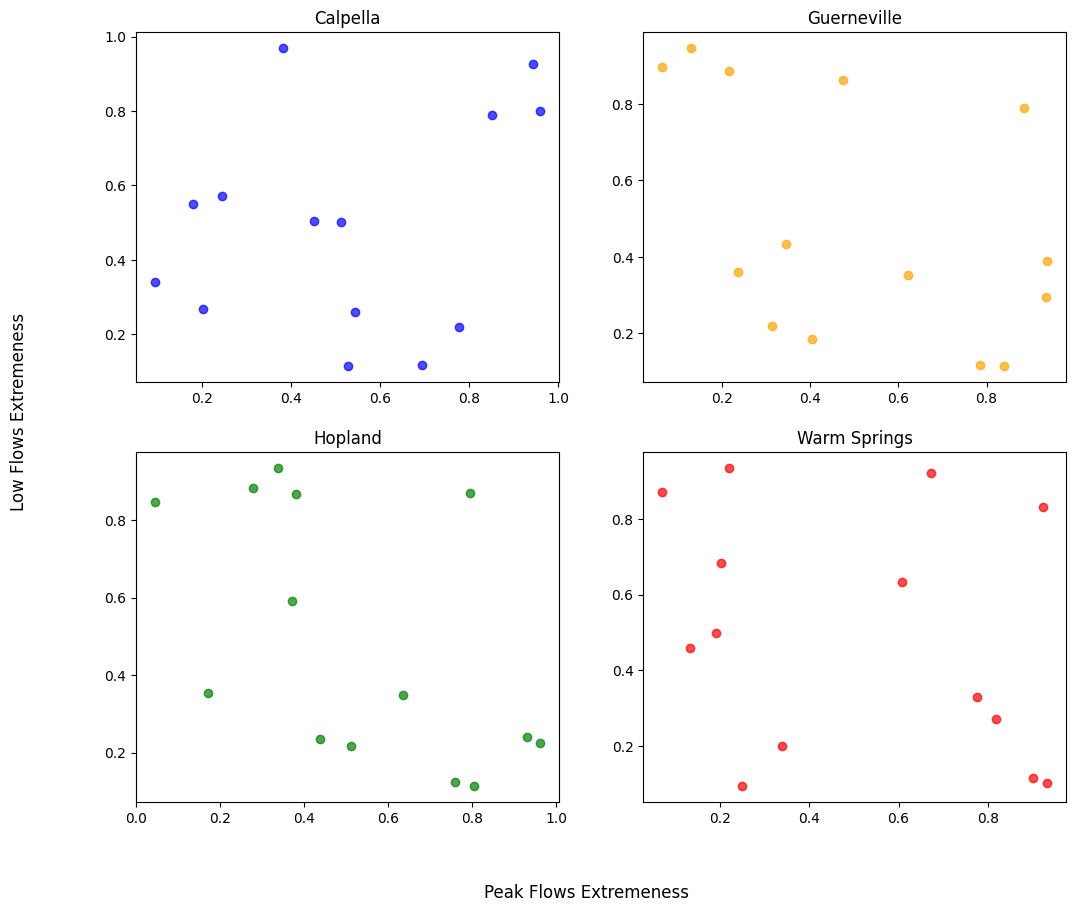

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].scatter(peak_flows['Calpella'][:-1], low_flows['Calpella'], label='Calpella', alpha=0.7, color='blue')
ax[0, 0].set_title('Calpella')
ax[0, 1].scatter(peak_flows['Guerneville'][:-1], low_flows['Guerneville'], label='Guerneville', alpha=0.7, color='orange')
ax[0, 1].set_title('Guerneville')
ax[1, 0].scatter(peak_flows['Hopland'][:-1], low_flows['Hopland'], label='Hopland', alpha=0.7, color='green')
ax[1, 0].set_title('Hopland')
ax[1, 1].scatter(peak_flows['Warm Springs'][:-1], low_flows['Warm Springs'], label='Warm Springs', alpha=0.7, color='red')
ax[1, 1].set_title('Warm Springs')
fig.supxlabel('Peak Flows Extremeness')
fig.supylabel('Low Flows Extremeness')

Peak flow extremeness and low flow extremeness are have basically zero correlation. For extreme years, we're interested in years in top right and bottom left as these represent years with both unusually high peak and unusually low low flows or unusually low peak and unusually high low flows respectively.

C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])
C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  precip_df.iloc[3:, 1] = pd.to_datetime(precip_df.iloc[3:, 1], errors="coerce")


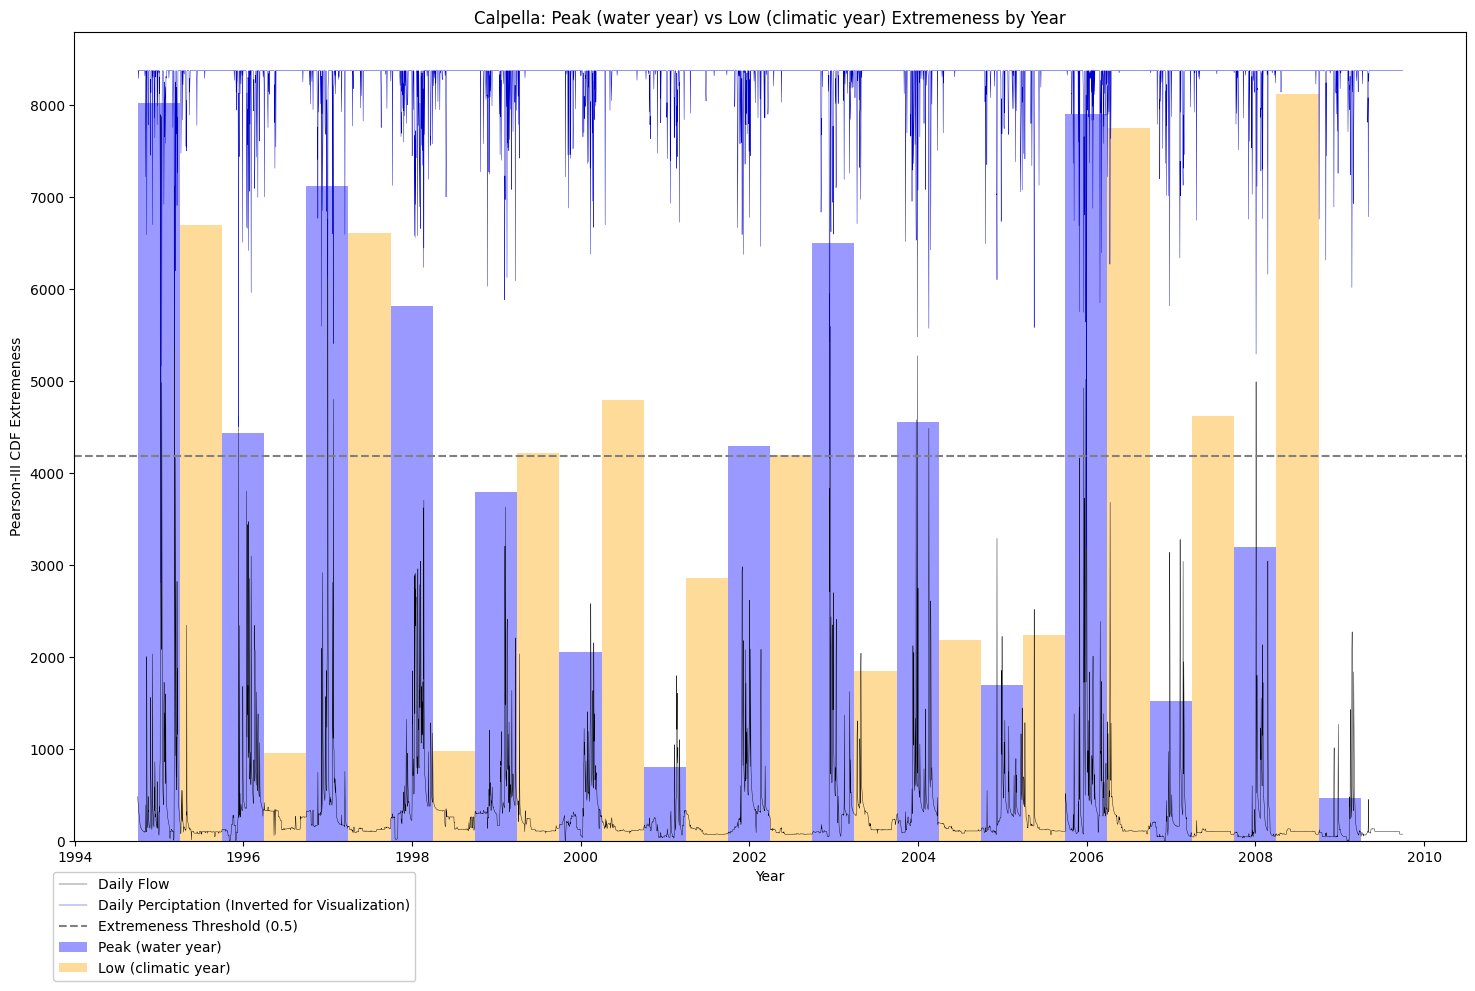

C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])
C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  precip_df.iloc[3:, 1] = pd.to_datetime(precip_df.iloc[3:, 1], errors="coerce")


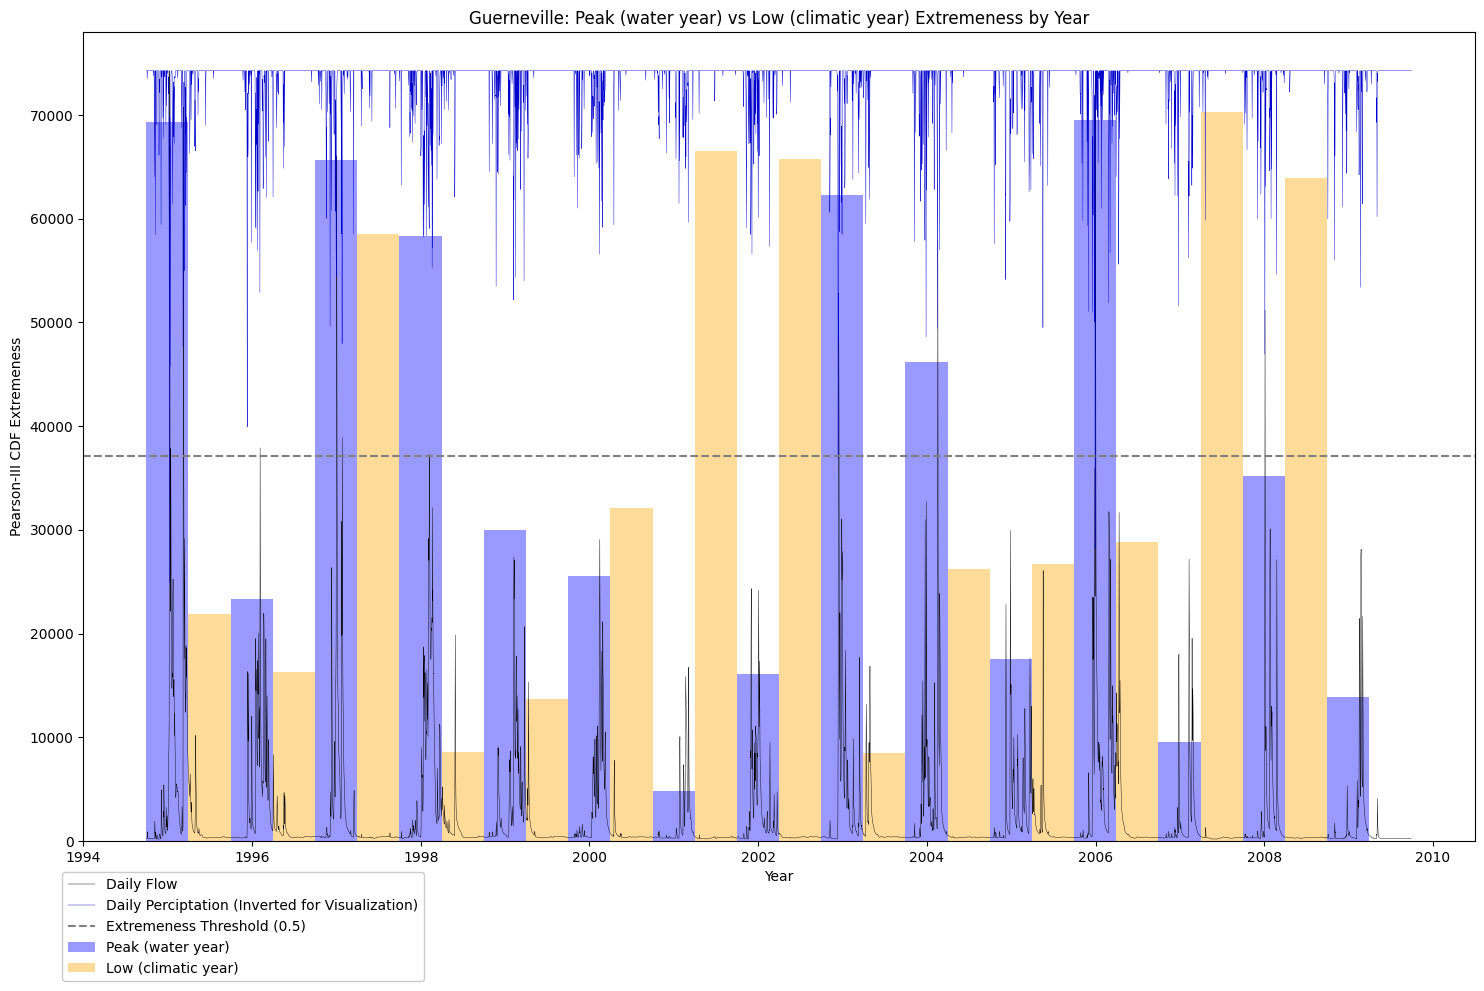

C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])
C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  precip_df.iloc[3:, 1] = pd.to_datetime(precip_df.iloc[3:, 1], errors="coerce")


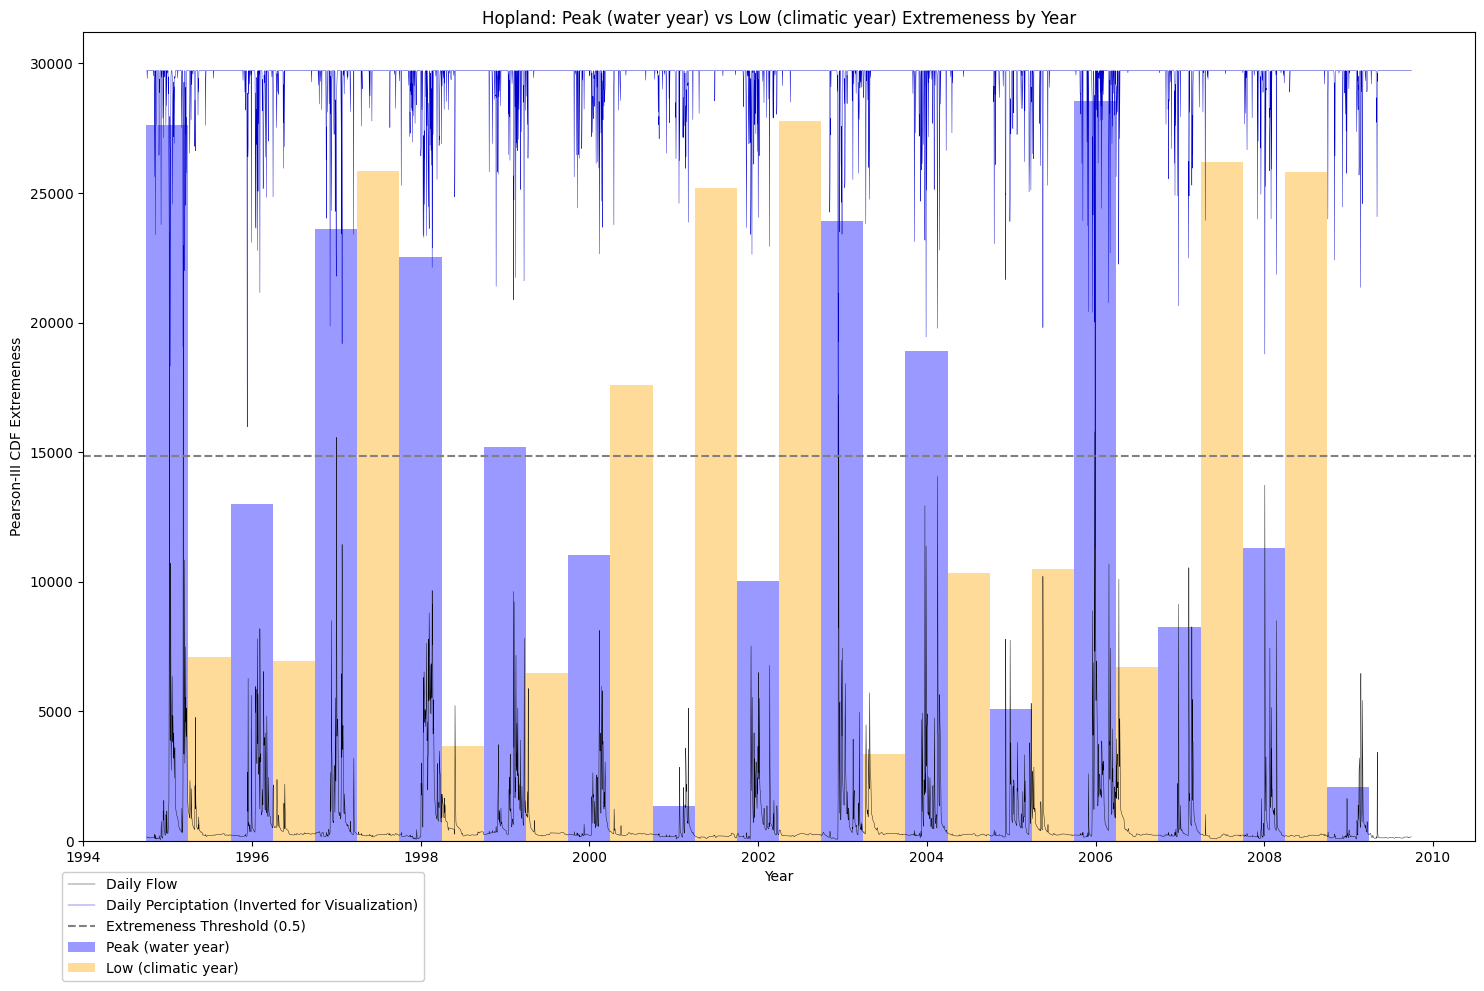

C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])
C:\Users\arman\AppData\Local\Temp\ipykernel_30208\3386541794.py:74: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  precip_df.iloc[3:, 1] = pd.to_datetime(precip_df.iloc[3:, 1], errors="coerce")


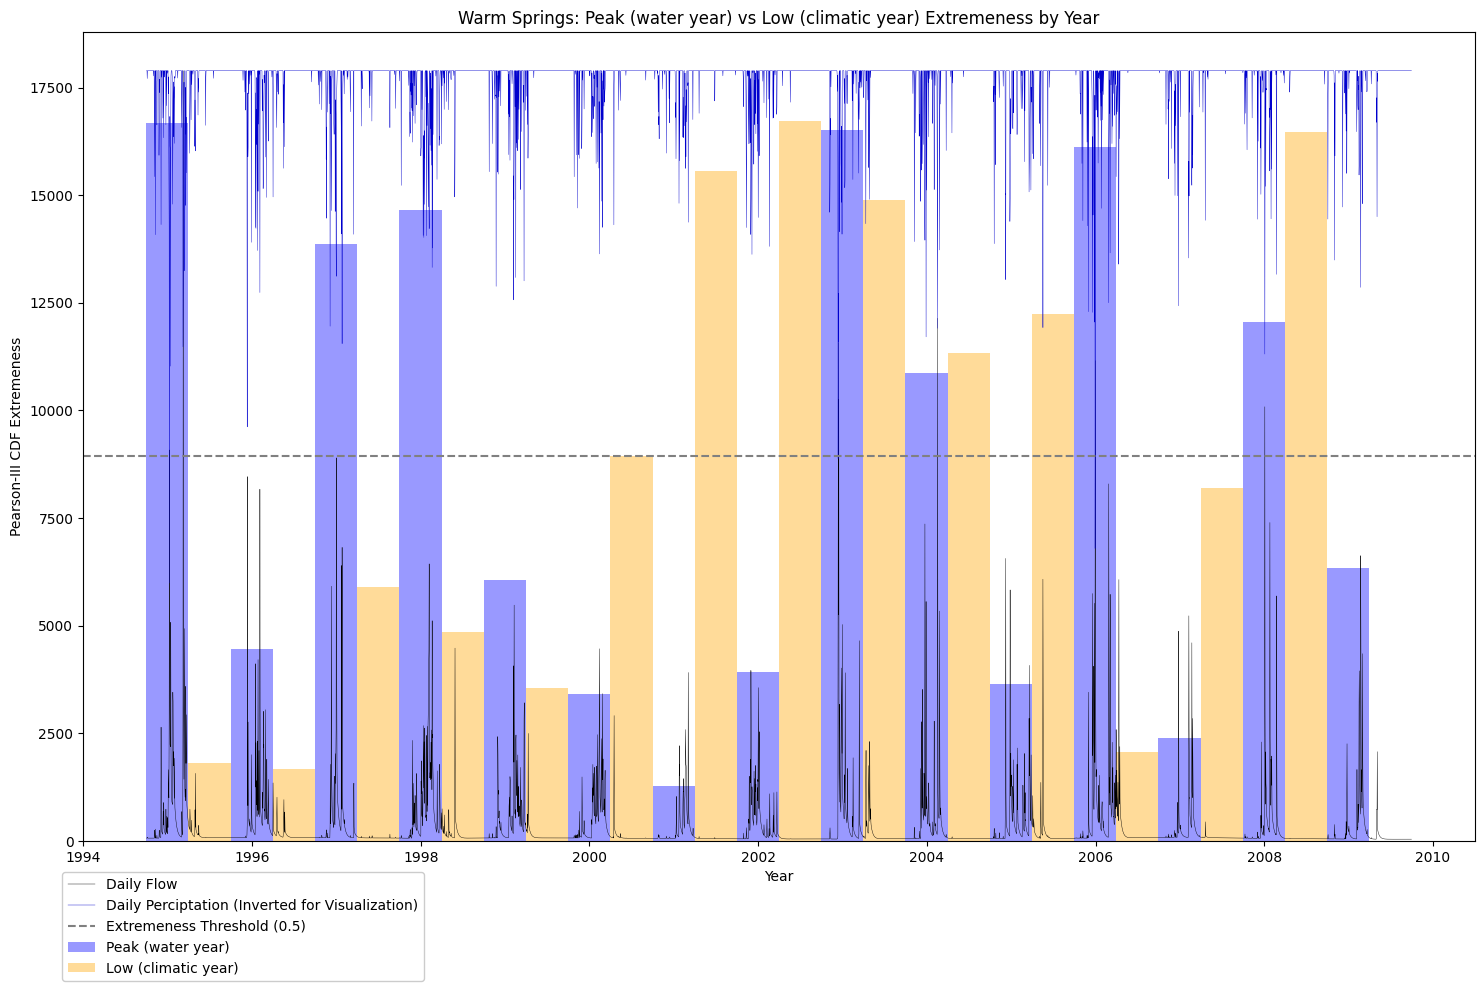

In [ ]:
basin_stats = {"calpella": None, "guerneville": None, "hopland": None, "warm_springs": None}

for basin in basins:
    precip_df = daily.copy()

    pos = peak_flows[basin]
    low = low_flows[basin]

    basin_stats_df = pd.DataFrame({
        "Year": peak_years[:-1],
        "Peak Extremeness": pos[:-1],
        "Low Extremeness": low
    })
    basin_stats[basin.lower().replace(" ", "_")] = basin_stats_df

    all_data[basin]['Date'] = pd.to_datetime(all_data[basin]['Date'])
    flow_df = all_data[basin].copy()
    flow_df['water_year_half'] = np.where(
        flow_df['Date'].dt.month.isin([10, 11, 12]),
        flow_df['Date'].dt.year + 0.5,
        np.where(
            flow_df['Date'].dt.month.isin([1, 2, 3]),
            flow_df['Date'].dt.year - 1 + 0.5,
            np.nan
        )
    )
    flow_df['climatic_year_half'] = np.where(
        flow_df['Date'].dt.month.between(4, 9),
        flow_df['Date'].dt.year + 0.5,
        np.nan
    )
    flow_df['peak_extremeness'] = None
    flow_df['low_extremeness'] = None

    # print(flow_df['water_year_half'].dropna().unique())
    # print(flow_df['climatic_year_half'].dropna().unique())

    for i, year in enumerate(flow_df['water_year_half'].dropna().unique()):
        flow_df.loc[flow_df['water_year_half'] == year, 'peak_extremeness'] = pos.iloc[i]

    for i, year in enumerate(flow_df['climatic_year_half'].dropna().unique()[:-1]):
        flow_df.loc[flow_df['climatic_year_half'] == year, 'low_extremeness'] = low.iloc[i]

    scaler = max(all_data[basin].iloc[:, 3])

    plt.figure(figsize=(15, 10))

    plt.bar(
        flow_df['Date'], 
        flow_df['peak_extremeness'] * scaler, 
        label="Peak (water year)", 
        alpha=0.4, 
        width=1,
        color='blue'
        )

    plt.bar(
        flow_df['Date'], 
        flow_df['low_extremeness'] * scaler,
        label="Low (climatic year)", 
        alpha=0.4, 
        width=1,
        color='orange'
        )
    
    plt.plot(
        all_data[basin]['Date'],
        all_data[basin].iloc[:, 3],
        color="black",
        linewidth=0.3,
        label="Daily Flow",
    )

    precip_df.iloc[3:, 1] = pd.to_datetime(precip_df.iloc[3:, 1], errors="coerce")
    precip_df.iloc[3:,27] = -pd.to_numeric(precip_df.iloc[3:,27]) * scaler/8 + scaler

    plt.plot(
        precip_df.iloc[3:, 1],
        precip_df.iloc[3:,27],
        color="mediumblue",
        linewidth=0.3,
        label="Daily Perciptation (Inverted for Visualization)",
    )

    plt.axhline(0.5 * max(all_data[basin].iloc[:, 3]), color='gray', linestyle='--', label='Extremeness Threshold (0.5)')
    plt.xlabel("Year")
    plt.ylabel("Pearson-III CDF Extremeness")
    plt.ylabel("Flow (cfs)")
    plt.gca().yaxis.tick_right()
    plt.title(f"{basin}: Peak (water year) vs Low (climatic year) Extremeness by Year")
    plt.legend(bbox_to_anchor=(0.25, -0.03), fancybox=True, framealpha=1)

    # plt.xticks(flow_df['water_year_half'].dropna().unique() + 0.5, rotation=45)

    plt.tight_layout()
    plt.savefig(f"{basin}_wet_dry_extremeness.png", dpi=300, bbox_inches="tight")
    plt.show()

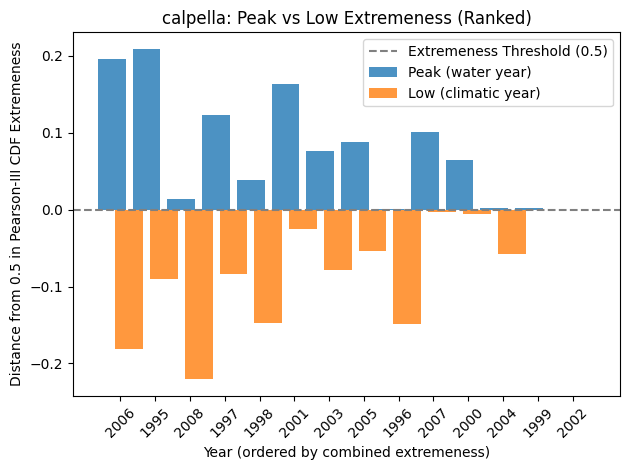

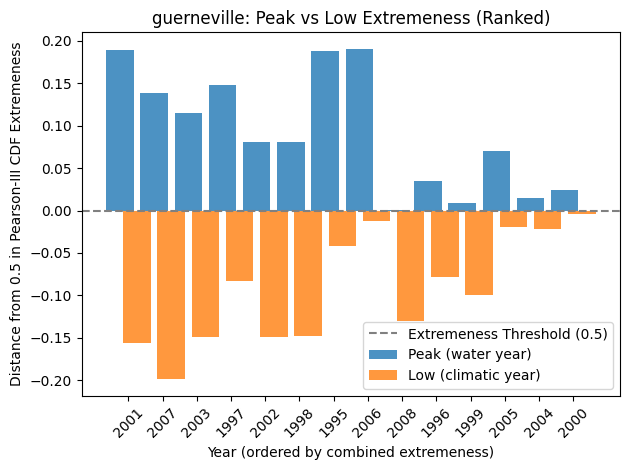

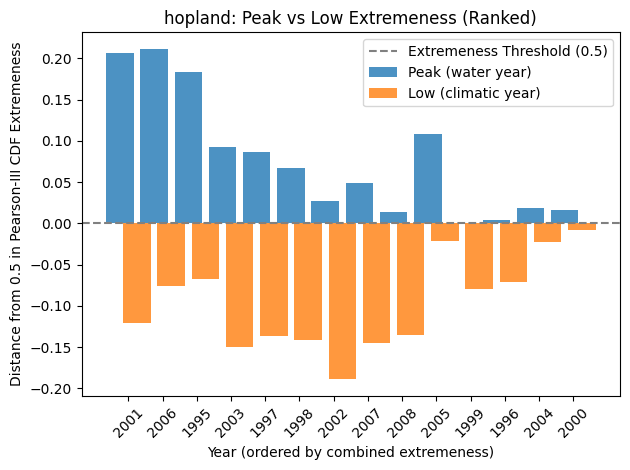

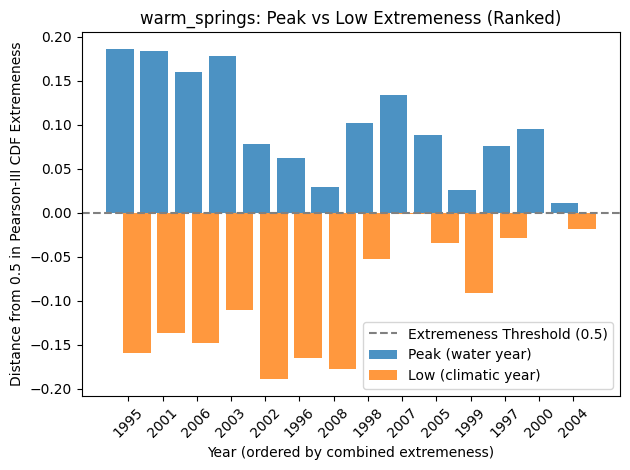

In [32]:
def year_extremeness(low_cdf, peak_cdf):
    return (low_cdf - 0.5)**2 + (peak_cdf - 0.5) ** 2

for basin in basin_stats:
    basin_data = basin_stats[basin]
    df = basin_data.copy()
    df['Low Extremeness'] = df['Low Extremeness'].apply(lambda x: (x - 0.5) ** 2)
    df['Peak Extremeness'] = df['Peak Extremeness'].apply(lambda x: (x - 0.5)**2)
    df['year_extremeness'] = year_extremeness(df['Low Extremeness'], df['Peak Extremeness'])
    df.sort_values('year_extremeness', inplace=True)

    df['Low Extremeness'] = -df['Low Extremeness']

    
    x = np.arange(len(df))

    plt.figure()

    plt.bar(x, df['Peak Extremeness'], label="Peak (water year)", alpha=0.8, width=0.8)
    plt.bar(x + 0.5, df['Low Extremeness'], label="Low (climatic year)", alpha=0.8, width=0.8)

    plt.axhline(0, color='gray', linestyle='--', label='Extremeness Threshold (0.5)')
    plt.xlabel("Year (ordered by combined extremeness)")
    plt.ylabel("Distance from 0.5 in Pearson-III CDF Extremeness")
    plt.title(f"{basin}: Peak vs Low Extremeness (Ranked)")
    plt.legend()

    plt.xticks(x + 0.25, df['Year'], rotation=45)

    plt.tight_layout()
    plt.savefig(f"{basin}_extremeness_sorted.png", dpi=300, bbox_inches="tight")
    plt.show()